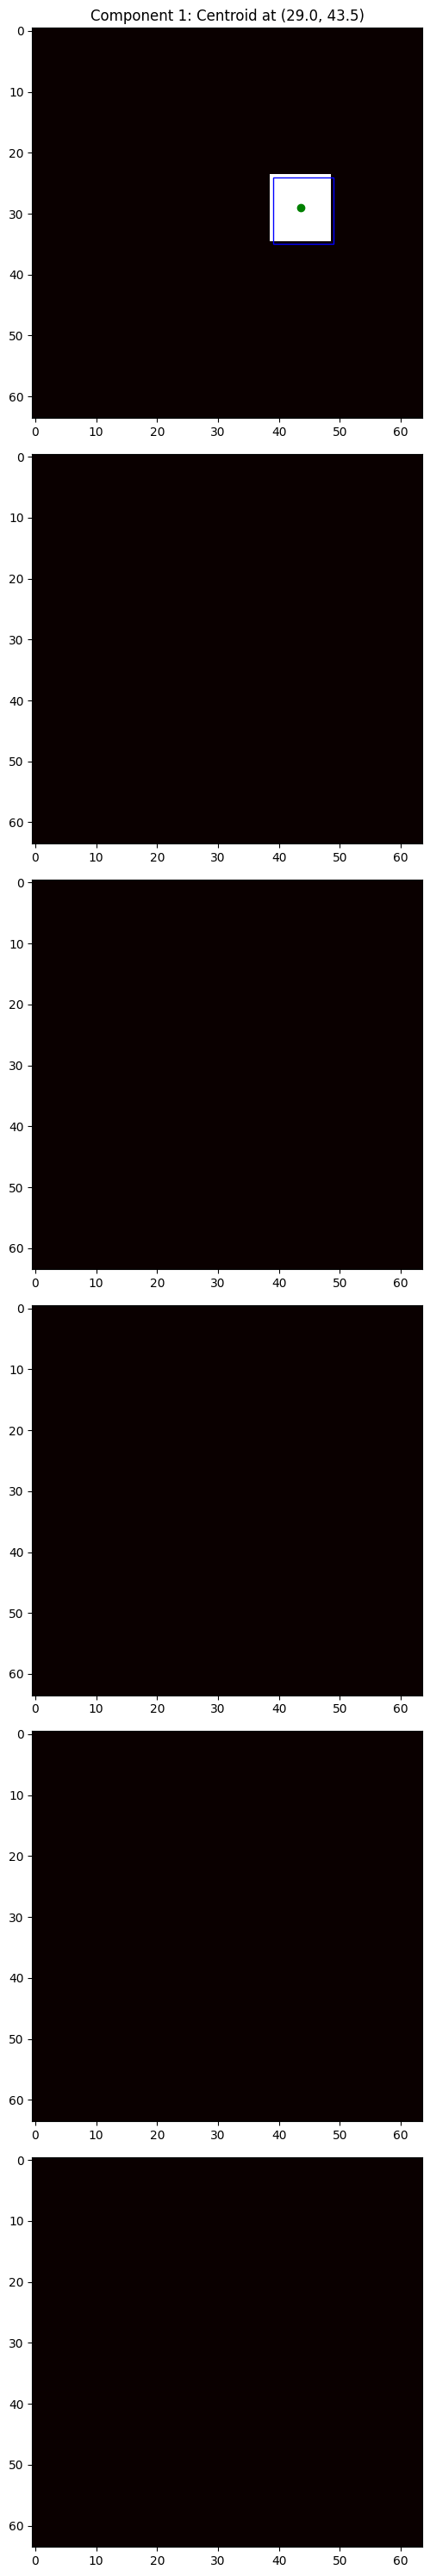

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label, find_objects, center_of_mass

# Provided bounding box data
bboxes = np.array([
    [39.8903408, 24.773323, 49.454777, 35.82823],
    [0.40461713, 0.2488891, 0.44437495, 0.2451111],
    [0.4801518, 0.56913036, 0.52614892, 0.60166949],
    [0.00044191495, 0.0005460676, 0.00068218674, 0.00090827933],
    [0.00040864121, 0.00038058122, 0.00060208299, 0.00024521281],
    [0.00052764977, 0.00058524718, 0.0002075122, 0.0010586288]
])

# Define image dimensions
image_dimensions = (64, 64)

# Function to create binary masks
def create_binary_mask(bboxes, image_shape):
    masks = np.zeros((len(bboxes), image_shape[0], image_shape[1]), dtype=np.uint8)
    for i, (x_min, y_min, x_max, y_max) in enumerate(bboxes):
        x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])
        masks[i, y_min:y_max, x_min:x_max] = 1
    return masks

# Function to extract properties and visualize
def visualize_components(masks):
    fig, axs = plt.subplots(len(masks), 1, figsize=(5, 5 * len(masks)))
    if len(masks) == 1:
        axs = [axs]  # Make it iterable if only one subplot
    for ax, mask in zip(axs, masks):
        labeled_mask, num_features = label(mask)
        ax.imshow(labeled_mask, cmap='hot')
        for i, slice_tuple in enumerate(find_objects(labeled_mask)):
            centroid = center_of_mass(mask, labels=labeled_mask, index=i+1)
            rect = plt.Rectangle((slice_tuple[1].start, slice_tuple[0].start), slice_tuple[1].stop - slice_tuple[1].start, slice_tuple[0].stop - slice_tuple[0].start, linewidth=1, edgecolor='b', facecolor='none')
            ax.add_patch(rect)
            ax.scatter(centroid[1], centroid[0], color='g')  # centroid plotting
            ax.set_title(f"Component {i+1}: Centroid at {centroid}")
    plt.tight_layout()
    plt.show()

# Create binary masks and visualize
prediction_masks = create_binary_mask(bboxes, image_dimensions)
visualize_components(prediction_masks)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label, find_objects, center_of_mass

# Hypothetical valid bounding boxes from ground truth
ground_truth_bboxes = np.array([
    [39, 24, 49, 34]  # Adjusted bounding box to fit within image dimensions and considered valid
])

# Define image dimensions
image_dimensions = (64, 64)

# Function to create binary masks
def create_binary_mask(bboxes, image_shape):
    masks = np.zeros((len(bboxes), image_shape[0], image_shape[1]), dtype=np.uint8)
    for i, (x_min, y_min, x_max, y_max) in enumerate(bboxes):
        x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])
        masks[i, y_min:y_max, x_min:x_max] = 1
    return masks

# Function to extract properties and visualize
# def visualize_components(masks):
#     fig, axs = plt.subplots(len(masks), 1, figsize=(5, 5 * len(masks)))
#     if len(masks) == 1:
#         axs = [axs]  # Make it iterable if only one subplot
#     for ax, mask in zip(axs, masks):
#         labeled_mask, num_features = label(mask)
#         ax.imshow(labeled_mask, cmap='hot')
#         for i, slice_tuple in enumerate(find_objects(labeled_mask)):
#             centroid = center_of_mass(mask, labels=labeled_mask, index=i+1)
#             rect = plt.Rectangle((slice_tuple[1].start, slice_tuple[0].start), slice_tuple[1].stop - slice_tuple[1].start, slice_tuple[0].stop - slice_tuple[0].start, linewidth=1, edgecolor='b', facecolor='none')
#             ax.add_patch(rect)
#             ax.scatter(centroid[1], centroid[0], color='g')  # centroid plotting
#             ax.set_title(f"Component {i+1}: Centroid at {centroid}")
#     plt.tight_layout()
#     plt.show()

# Create binary masks for ground truth and visualize
ground_truth_masks = create_binary_mask(ground_truth_bboxes, image_dimensions)
# visualize_components(ground_truth_masks)


In [10]:
def calculate_iou(gt_mask, pred_mask):
    intersection = np.logical_and(gt_mask, pred_mask)
    union = np.logical_or(gt_mask, pred_mask)
    iou = np.sum(intersection) / np.sum(union)
    return iou


In [11]:
def calculate_centroid_deviation(gt_mask, pred_mask):
    gt_centroid = center_of_mass(gt_mask)
    pred_centroid = center_of_mass(pred_mask)
    deviation = np.sqrt((gt_centroid[0] - pred_centroid[0]) ** 2 + (gt_centroid[1] - pred_centroid[1]) ** 2)
    return deviation


In [12]:
def calculate_precision_recall(gt_masks, pred_masks, threshold=0.5):
    tp = 0
    fp = 0
    fn = 0
    
    for gt_mask, pred_mask in zip(gt_masks, pred_masks):
        intersection = np.logical_and(gt_mask, pred_mask)
        union = np.logical_or(gt_mask, pred_mask)
        iou = np.sum(intersection) / np.sum(union)
        
        if iou >= threshold:
            tp += 1
        else:
            fp += 1
    
    fn = len(gt_masks) - tp
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    return precision, recall


In [13]:
ground_truth_masks = create_binary_mask(ground_truth_bboxes, image_dimensions)
prediction_masks = create_binary_mask(bboxes, image_dimensions)  # You need to replace this with your actual function to generate predicted masks
precision, recall = calculate_precision_recall(ground_truth_masks, prediction_masks)


In [14]:
precision, recall

(0.0, 0.0)